<a href="https://colab.research.google.com/github/jarpit2003/R_programming_assig/blob/main/Rprogrammingassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
generate_random_string <- function(length) {
  letters_and_digits <- c(letters, LETTERS, 0:9)
  paste0(sample(letters_and_digits, length, replace = TRUE), collapse = "")
}
num_lines <- 1000
string_length <- 10
fileConn <- file("random_strings.txt")
writeLines(sapply(1:num_lines, function(x) generate_random_string(string_length)), fileConn)
close(fileConn)
cat("File random_strings.txt created with 1000 lines of random strings.\n")



File random_strings.txt created with 1000 lines of random strings.


In [11]:
install.packages("tidyr")
library(ggplot2)
library(tidyr)

# Set the seed for reproducibility
set.seed(123)

# Define the number of rows and columns
num_rows <- 100
num_cols <- 30

# Generate the random dataset
random_dataset <- matrix(sample(1:200, num_rows * num_cols, replace = TRUE), nrow = num_rows, ncol = num_cols)
random_dataset_df <- as.data.frame(random_dataset)

# (i) Replace all the values with NA in the dataset defined between [10, 60]
random_dataset_df[random_dataset_df >= 10 & random_dataset_df <= 60] <- NA

# Print the count of number rows having missing values
count_rows_with_na <- sum(apply(random_dataset_df, 1, function(row) any(is.na(row))))
cat("Number of rows having missing values:", count_rows_with_na, "\n")

# (ii) Replace all the NA values with the average of the column value
for(i in 1:ncol(random_dataset_df)) {
  random_dataset_df[is.na(random_dataset_df[, i]), i] <- mean(random_dataset_df[, i], na.rm = TRUE)
}

# (iii) Find the Pearson correlation among all the columns and plot heat map
correlation_matrix <- cor(random_dataset_df, method = "pearson")
melted_correlation_matrix <- melt(correlation_matrix)
ggplot(data = melted_correlation_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1)) +
  theme_minimal() +
  ggtitle("Pearson Correlation Heat Map")

# Select columns having correlation <= 0.7
selected_columns <- names(which(apply(correlation_matrix, 2, function(x) all(abs(x) <= 0.7))))

# (iv) Normalize all the values in the dataset between 0 and 10
min_val <- min(random_dataset_df)
max_val <- max(random_dataset_df)
normalized_dataset_df <- (random_dataset_df - min_val) / (max_val - min_val) * 10

# (v) Replace all the values in the dataset with 1 if value <= 0.5 else with 0
binary_dataset_df <- as.data.frame(ifelse(normalized_dataset_df <= 0.5, 1, 0))

# Save the final datasets
write.csv(random_dataset_df, "cleaned_random_dataset.csv", row.names = FALSE)
write.csv(normalized_dataset_df, "normalized_random_dataset.csv", row.names = FALSE)
write.csv(binary_dataset_df, "binary_random_dataset.csv", row.names = FALSE)

cat("Datasets saved as cleaned_random_dataset.csv, normalized_random_dataset.csv, and binary_random_dataset.csv.\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Number of rows having missing values: 100 


ERROR: Error in melt(correlation_matrix): could not find function "melt"


Number of rows having missing values: 100 
Datasets saved as cleaned_random_dataset.csv, normalized_random_dataset.csv, and binary_random_dataset.csv.


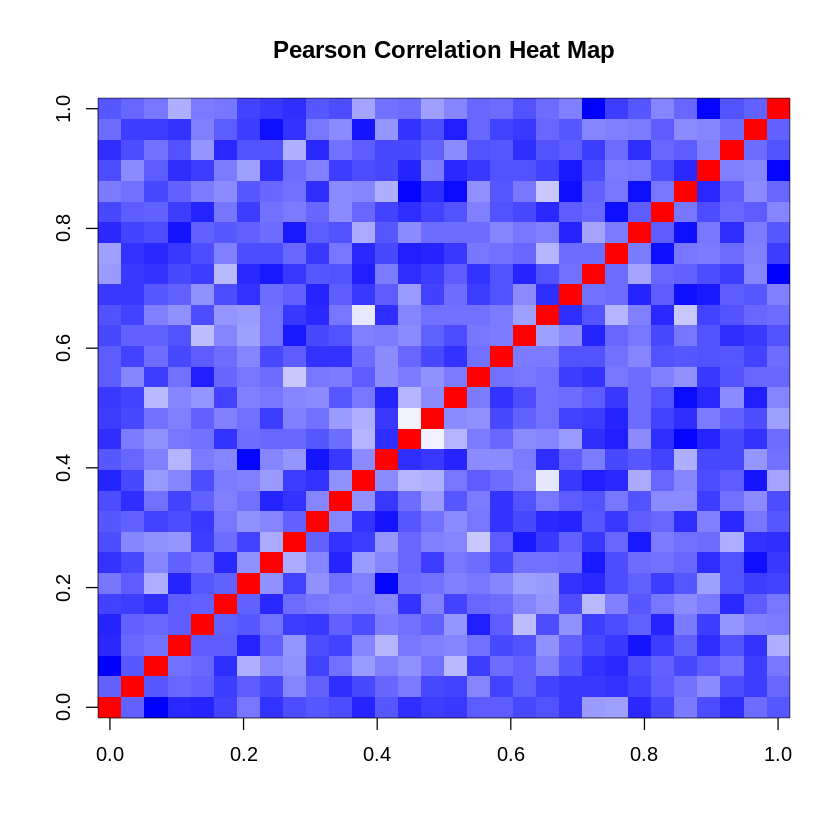

In [12]:
# Set the seed for reproducibility
set.seed(123)

# Define the number of rows and columns
num_rows <- 100
num_cols <- 30

# Generate the random dataset
random_dataset <- matrix(sample(1:200, num_rows * num_cols, replace = TRUE), nrow = num_rows, ncol = num_cols)
random_dataset_df <- as.data.frame(random_dataset)

# (i) Replace all the values with NA in the dataset defined between [10, 60]
random_dataset_df[random_dataset_df >= 10 & random_dataset_df <= 60] <- NA

# Print the count of number rows having missing values
count_rows_with_na <- sum(apply(random_dataset_df, 1, function(row) any(is.na(row))))
cat("Number of rows having missing values:", count_rows_with_na, "\n")

# (ii) Replace all the NA values with the average of the column value
for(i in 1:ncol(random_dataset_df)) {
  random_dataset_df[is.na(random_dataset_df[, i]), i] <- mean(random_dataset_df[, i], na.rm = TRUE)
}

# (iii) Find the Pearson correlation among all the columns and plot heat map
correlation_matrix <- cor(random_dataset_df, method = "pearson")

# Plot heat map
image(correlation_matrix, main = "Pearson Correlation Heat Map", col = colorRampPalette(c("blue", "white", "red"))(100))

# Select columns having correlation <= 0.7
selected_columns <- names(which(apply(correlation_matrix, 2, function(x) all(abs(x) <= 0.7))))

# (iv) Normalize all the values in the dataset between 0 and 10
min_val <- min(random_dataset_df)
max_val <- max(random_dataset_df)
normalized_dataset_df <- (random_dataset_df - min_val) / (max_val - min_val) * 10

# (v) Replace all the values in the dataset with 1 if value <= 0.5 else with 0
binary_dataset_df <- as.data.frame(ifelse(normalized_dataset_df <= 0.5, 1, 0))

# Save the final datasets
write.csv(random_dataset_df, "cleaned_random_dataset.csv", row.names = FALSE)
write.csv(normalized_dataset_df, "normalized_random_dataset.csv", row.names = FALSE)
write.csv(binary_dataset_df, "binary_random_dataset.csv", row.names = FALSE)

cat("Datasets saved as cleaned_random_dataset.csv, normalized_random_dataset.csv, and binary_random_dataset.csv.\n")


In [16]:
# Set seed for reproducibility
set.seed(123)

# Number of rows and columns
num_rows <- 500
num_cols <- 10

# Column ranges
col_ranges <- list(
  c(-10, 10), c(-10, 10), c(-10, 10), c(-10, 10),  # Columns 1-4
  c(10, 20), c(10, 20), c(10, 20), c(10, 20),      # Columns 5-8
  c(-100, 100), c(-100, 100)                      # Columns 9-10
)

# Generate random data
data <- matrix(nrow = num_rows, ncol = num_cols)
for (i in 1:num_cols) {
  data[,i] <- runif(num_rows, min = col_ranges[[i]][1], max = col_ranges[[i]][2])
}

# Convert to data frame
df <- as.data.frame(data)
colnames(df) <- paste0("col", 1:num_cols)

# Display first few rows of the dataset
head(df)


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-4.248450,-2.927878,-4.5275453,8.7605652,11.59674,18.53532,12.05827,12.41494,-39.10716,-78.991652
2,5.766103,-2.671171,1.8773387,9.7600661,11.44516,16.66007,19.42539,14.10778,66.56376,-19.498880
3,-1.820462,-4.257997,-6.7963037,-0.8736088,11.49180,17.33327,13.79324,18.11175,18.72950,-8.864683
4,7.660348,-8.400542,7.0686048,-5.3877011,15.14434,13.14740,16.26240,13.79141,61.43933,24.929049
5,8.809346,-2.690915,6.9547832,3.9097854,14.92827,16.67718,11.83502,14.46950,-41.18984,-84.228944
6,-9.088870,-6.439724,-0.4422637,1.1326469,16.16343,14.63887,16.59208,15.70508,-71.78296,-31.603455


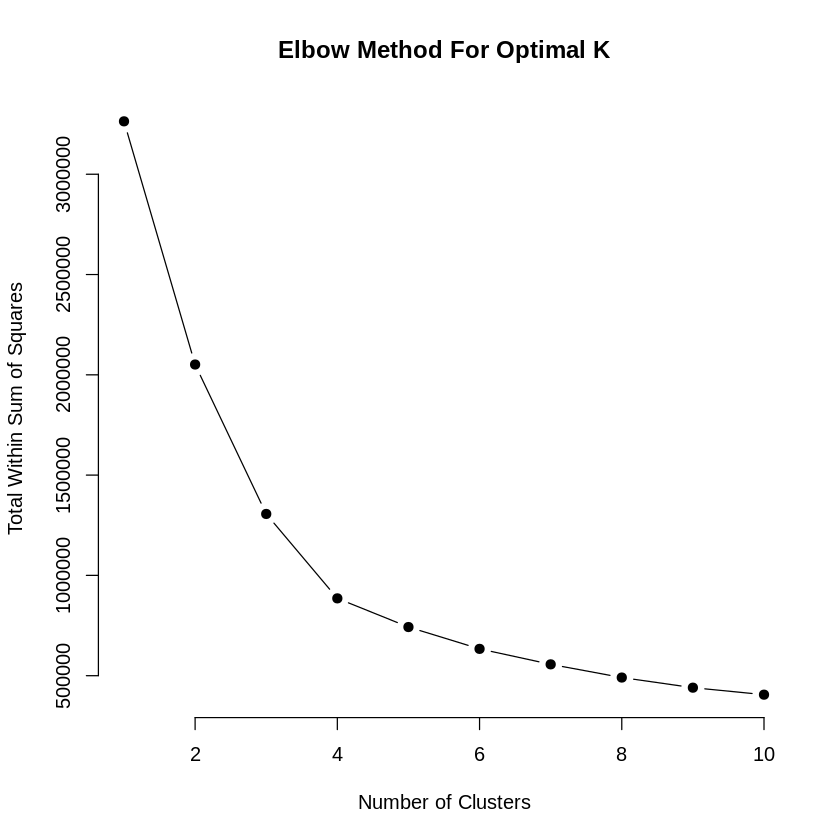

In [17]:
# Perform K-Means clustering and determine optimal number of clusters
distortions <- vector()
for (k in 1:10) {
  kmeans_model <- kmeans(df, centers=k, nstart=25)
  distortions[k] <- kmeans_model$tot.withinss
}

# Plot the elbow plot
plot(1:10, distortions, type="b", pch=19, frame=FALSE,
     xlab="Number of Clusters", ylab="Total Within Sum of Squares",
     main="Elbow Method For Optimal K")


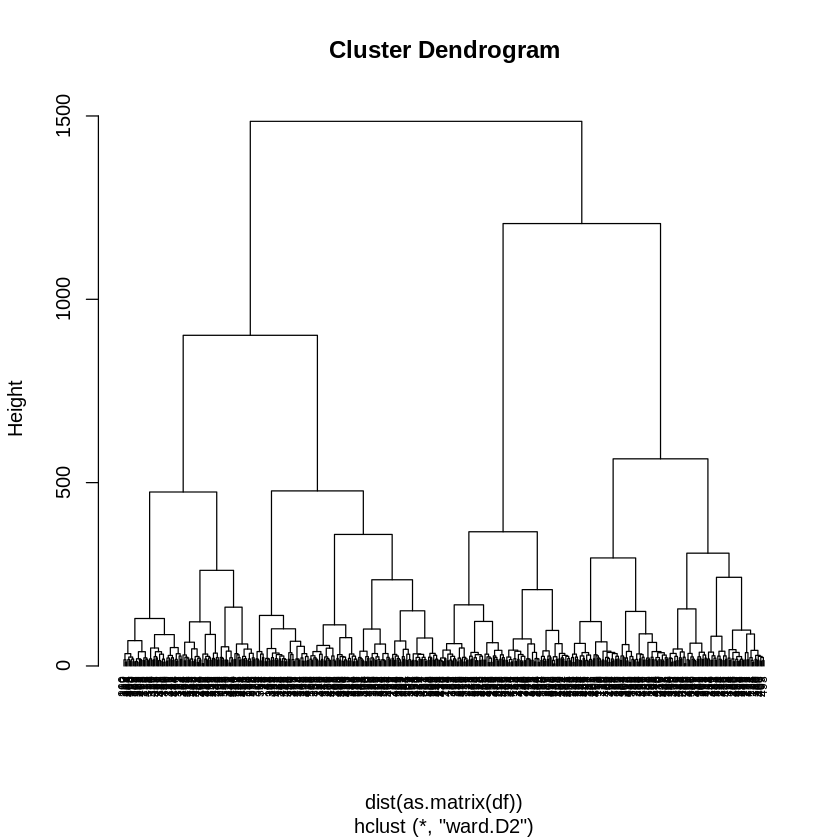

In [18]:
# Perform hierarchical clustering
hc <- hclust(dist(as.matrix(df)), method="ward.D2")

# Plot dendrogram
plot(hc, cex=0.6, hang=-1)


q4

In [23]:
# Set seed for reproducibility
set.seed(123)

# Number of rows and columns
num_rows <- 600
num_cols <- 15

# Generate random data
data <- matrix(runif(num_rows*num_cols, min = -100, max = 100), nrow = num_rows, ncol = num_cols)
df <- as.data.frame(data)

# Assign column names
colnames(df) <- paste0("col", 1:num_cols)

# Display first few rows of the dataset
head(df)


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-42.48450,-52.55406,71.718281,-68.94717,46.46435,-58.83462,-80.272850,-15.8634393,-37.10002,-95.515656,-11.947796,-23.884034,-16.91590,-93.04311,48.494918
2,57.66103,37.29807,77.476951,69.17020,21.94214,88.50781,24.689993,-90.2970679,-18.23485,5.673304,-20.521569,57.353631,-79.32863,-51.96111,-54.940917
3,-18.20462,-54.83632,-2.181700,-57.12391,-55.12557,-24.13524,-48.725448,30.1850933,-40.48216,-16.307350,-25.690469,97.105047,76.90347,-13.77033,-62.930270
4,76.60348,-36.30108,43.618362,33.97465,83.23420,25.24803,-4.146687,0.3795191,-75.97096,94.959593,5.761715,1.673764,97.43211,36.69802,-37.865065
5,88.09346,-65.20324,-2.658885,23.55129,60.55220,-63.29952,-4.571299,57.2757050,-44.32561,-90.086400,-85.242918,61.553086,18.33091,65.97988,80.398650
6,-90.88870,60.28592,97.741772,-90.00004,-37.51828,31.84152,66.098283,9.4053117,-44.88818,27.700245,43.369954,92.619152,80.92545,-68.37803,2.078657


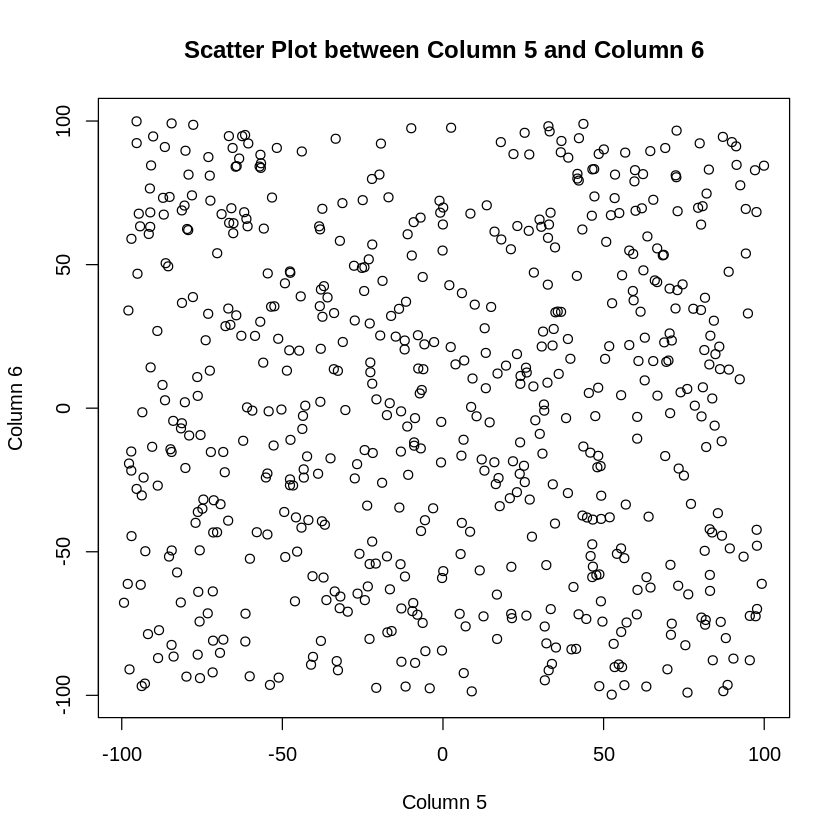

In [24]:
# Plot scatter graph
plot(df$col5, df$col6,
     xlab = "Column 5", ylab = "Column 6",
     main = "Scatter Plot between Column 5 and Column 6")


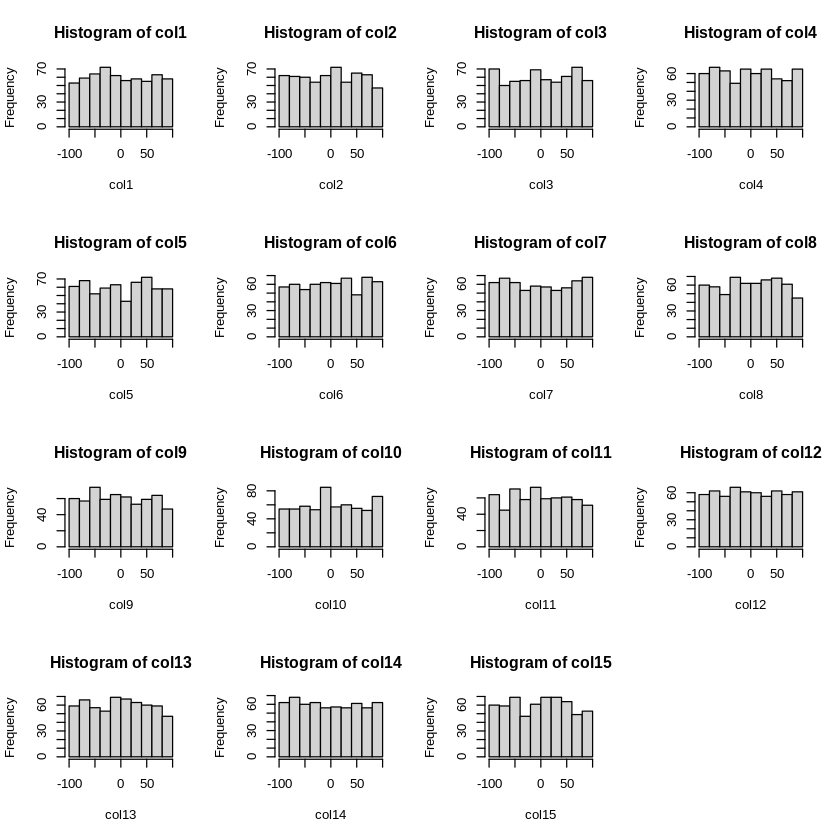

In [28]:
par(mfrow = c(4, 4))  # Arrange plots in a 4x4 grid

for (i in 1:num_cols) {
  hist(df[, i], main = paste("Histogram of", colnames(df)[i]), xlab = colnames(df)[i])
}
par(mfrow = c(1, 1))

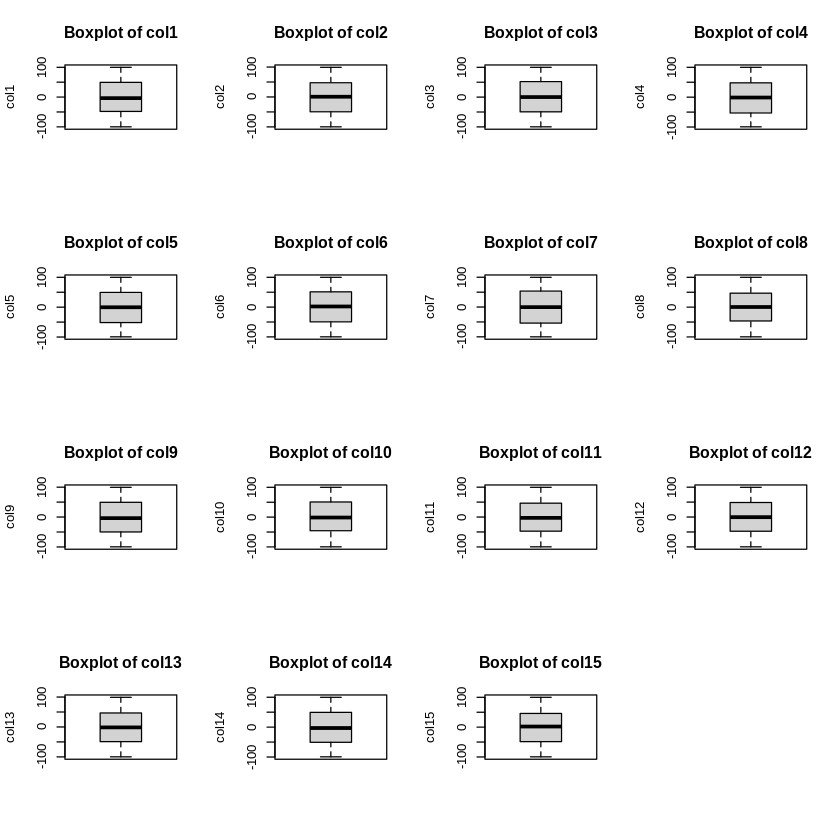

In [29]:
# Plot boxplot of each column in a single graph
par(mfrow = c(4, 4))  # Arrange plots in a 4x4 grid

for (i in 1:num_cols) {
  boxplot(df[,i], main = paste("Boxplot of", colnames(df)[i]), ylab = colnames(df)[i])
}

# Reset the plotting layout
par(mfrow = c(1, 1))


Question 5

In [30]:
# Set seed for reproducibility
set.seed(123)

# Number of rows and columns
num_rows <- 500
num_cols <- 5

# Generate random data
data <- matrix(runif(num_rows * num_cols, min = 5, max = 10), nrow = num_rows, ncol = num_cols)
df <- as.data.frame(data)

# Assign column names
colnames(df) <- paste0("col", 1:num_cols)

# Display first few rows of the dataset
head(df)


,col1,col2,col3,col4,col5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.437888,6.768030,6.368114,9.690141,5.798370
2,8.941526,6.832207,7.969335,9.940017,5.722579
3,7.044885,6.435501,5.800924,7.281598,5.745902
4,9.415087,5.399865,9.267151,6.153075,7.572171
5,9.702336,6.827271,9.238696,8.477446,7.464137
6,5.227782,5.890069,7.389434,7.783162,8.081714


In [31]:
# Perform t-Test on each column
t_test_results <- lapply(df, function(col) {
  t.test(col)
})

# Display t-Test results
names(t_test_results) <- colnames(df)
t_test_results


$col1

	One Sample t-test

data:  col
t = 117.56, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.351464 7.601373
sample estimates:
mean of x 
 7.476418 


$col2

	One Sample t-test

data:  col
t = 115.29, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.368610 7.624109
sample estimates:
mean of x 
  7.49636 


$col3

	One Sample t-test

data:  col
t = 117.93, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.345020 7.593909
sample estimates:
mean of x 
 7.469464 


$col4

	One Sample t-test

data:  col
t = 116.53, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.386422 7.639779
sample estimates:
mean of x 
 7.513101 


$col5

	One Sample t-test

data:  col
t = 112.82, df = 499, p-value < 2.2e-16
alternative hypothesis: true m

In [32]:
# Perform Wilcoxon Signed Rank Test on each column
wilcox_test_results <- lapply(df, function(col) {
  wilcox.test(col)
})

# Display Wilcoxon Signed Rank Test results
names(wilcox_test_results) <- colnames(df)
wilcox_test_results


$col1

	Wilcoxon signed rank test with continuity correction

data:  col
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


$col2

	Wilcoxon signed rank test with continuity correction

data:  col
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


$col3

	Wilcoxon signed rank test with continuity correction

data:  col
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


$col4

	Wilcoxon signed rank test with continuity correction

data:  col
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


$col5

	Wilcoxon signed rank test with continuity correction

data:  col
V = 125250, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0



In [33]:
# Perform Two Sample t-Test on Column 3 and Column 4
t_test_2samp <- t.test(df[, 3], df[, 4])

# Perform Wilcoxon Rank Sum Test (Mann-Whitney U Test) on Column 3 and Column 4
wilcox_test_2samp <- wilcox.test(df[, 3], df[, 4])

# Display results
cat("Two Sample t-Test between Column 3 and Column 4:\n")
print(t_test_2samp)

cat("\nWilcoxon Rank Sum Test between Column 3 and Column 4:\n")
print(wilcox_test_2samp)


Two Sample t-Test between Column 3 and Column 4:

	Welch Two Sample t-test

data:  df[, 3] and df[, 4]
t = -0.48279, df = 997.68, p-value = 0.6293
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2209985  0.1337259
sample estimates:
mean of x mean of y 
 7.469464  7.513101 


Wilcoxon Rank Sum Test between Column 3 and Column 4:

	Wilcoxon rank sum test with continuity correction

data:  df[, 3] and df[, 4]
W = 122733, p-value = 0.6197
alternative hypothesis: true location shift is not equal to 0

